## <center>Selecting   an image from a list of images with a dropdown menu or a slider </center>

### Flipping between four images with a dropdown menu

The first  example illustrates how to perform  trace and layout updates for a given PlotlyJS plot,
via `layout.updatemenus[].buttons`, [https://plotly.com/julia/reference/layout/updatemenus/](https://plotly.com/julia/reference/layout/updatemenus/). See also [https://plotly.com/python/dropdowns/](https://plotly.com/python/dropdowns/).

 Initially is defined a plot (fig) consisting in four `PlotlyJS.image`-type traces, but only the first one is visible (the trace attribute, `visible`, is set as  `visible=true`).
We define a dropdown menu with four options/buttons. When the $k^{th}$ button is selected, $k=1:4$, then the corresponding image is displayed, as well as  its title.
The four images  are, respectively, a circular image as an input image for `ImageTransformations.warp`, considered as  superimposed over the unit disk
in the complex plane (WIP), and three warped images of this one, through three distinct complex functions.

WebIO._IJuliaInit()

data: [
  "image with fields source and type",
  "image with fields source, type, and visible",
  "image with fields source, type, and visible",
  "image with fields source, type, and visible"
]

layout: "layout with fields font, height, margin, plot_bgcolor, template, title, updatemenus, width, xaxis, and yaxis"
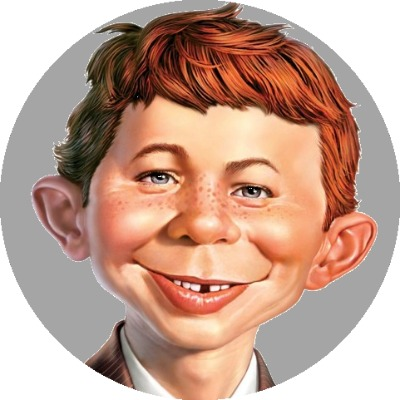
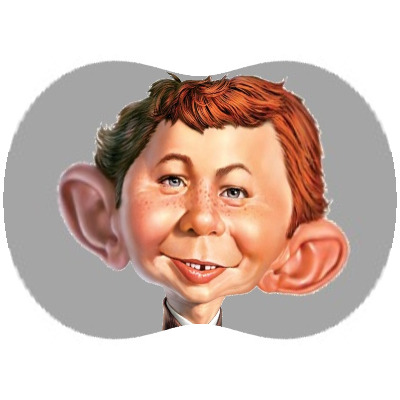
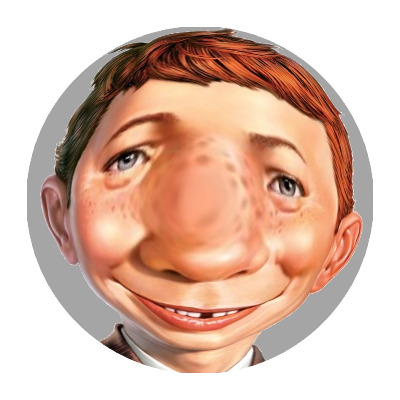
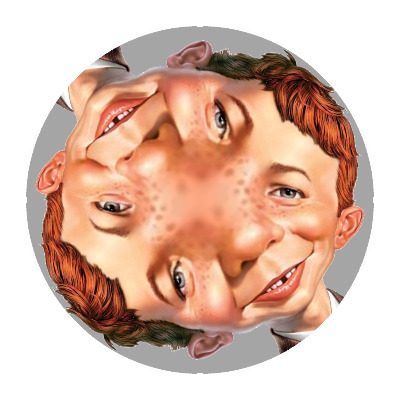

In [1]:
using Base64, PlotlyJS

bs64string(data::AbstractVector) = "data:image/png;base64,"*base64encode(data)

files= ["images/circular-boy.jpg", "images/btanz.jpg", 
        "images/zover-sqrtabsz.jpg", "images/sqrtz.jpg"]
vecuint8 = [read(f)  for f in files];
titles=[L"$\text{Image superimposed over unit disk}, D(0,1)\subset\mathbb{C}$",
        L"$\text{Unit disk/input image warped by}\:\: f(z)=\tan(z)$",
        L"$\text{Unit disk/input image warped by}\:\: f(z)=z/\sqrt{|z|}$", 
        L"$\text{Unit disk/input image warped by}\:\: f(z)=\sqrt{z}$"]
fig = Plot([PlotlyJS.image(; source=bs64string(v)) for v in vecuint8],
            Layout(width=500, height=500, xaxis_visible=false, yaxis_visible=false,
                   plot_bgcolor="rgba(0,0,0,0)"))
restyle!(fig, visible=false, [2, 3, 4]) # fig.data[k] , k=2:4 are set invisible at start
#set the plot title displayed at start, and changed by each button selection
relayout!(fig, title_text="Image warping through complex transformations", 
             title_x=0.45, margin_t=120, font_family="Balto")    
relayout!(fig, 
          updatemenus=[
              attr(active=0,
                  buttons= [
                      attr(;label, 
                            method="update", 
                            args=[attr(visible=circshift([true, false, false, false], k-1)),#updates for traces
                                  attr(title_text=titles[k], title_x=0.43)]) #updates for layout
                                        for (k,label) in enumerate(["Input image", "First warping", 
                                                           "Second warping", "Third warping"])],
                    x=1.35, y=0.95, #dropdown menu position
                              )])

display(fig)                             

Note that if we do not set a transparent plot background, `plot_bgcolor="rgba(0,0,0,0)"`, then on zoom is displayed the background of the default `layout.template`.

### Displaying the same four images using a slider

In [ ]:
figs = Plot([fig.data[k] for k in 1:4])#  transfer fig.data[k] to the new plot
restyle!(fig, visible=false, [2, 3, 4])
relayout!(figs, title_text="Image warping through complex transformations", 
          title_x=0.45, margin_t=120, font_family="Balto",
          width=500, height=500, xaxis_visible=false, yaxis_visible=false,
             plot_bgcolor="rgba(0,0,0,0)")  
relayout!(figs, 
          sliders=[attr(active = 0, 
                        y=0,
                        steps = [#fig.layout.updatemenus[1].buttons is copied here, i.e. steps coincide with button defs
                        attr(;label, 
                              method="update", 
                              args=[attr(visible=circshift([true, false, false, false], k-1)),#updates for traces
                                    attr(title_text=titles[k], title_x=0.43)]) #updates for layout
                                        for (k,label) in enumerate(["Input image", "First warping", 
                                                           "Second warping", "Third warping"])],)])
display(figs)
